In [1]:
import pandas as pd
import numpy as np

In [5]:
from matplotlib import pyplot as plt
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error, explained_variance_score, max_error

In [6]:
df = pd.read_csv('../../dados/historico de demanda.csv', delimiter=";")

In [11]:
df

,ano,mes,dia,dia_semana,data,COD435,COD426,COD470,COD476,demanda,COD426_A,COD470_A,COD476_A
0,2013,10,1,3,01/10/2013,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
1,2013,10,2,4,02/10/2013,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,2013,10,3,5,03/10/2013,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,2013,10,4,6,04/10/2013,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,2013,10,7,2,07/10/2013,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
909,2017,8,8,3,08/08/2017,NaN,28.0,1.0,5.0,0.0,28.0,1.0,5.0
910,2017,7,7,6,07/07/2017,NaN,NaN,4.0,NaN,0.0,0.0,4.0,0.0
911,2017,7,13,5,13/07/2017,NaN,NaN,14.0,NaN,0.0,0.0,14.0,0.0
912,2017,6,29,5,29/06/2017,NaN,NaN,NaN,4.0,0.0,0.0,0.0,4.0


In [7]:
df["demanda"] = df["COD435"].fillna(0)
df["COD426_A"] = df["COD426"].fillna(0)
df["COD470_A"] = df["COD470"].fillna(0)
df["COD476_A"] = df["COD476"].fillna(0)

In [28]:
dados = df[["mes", "dia", "dia_semana", "demanda"]]
dados

,mes,dia,dia_semana,demanda
0,10,1,3,0.0
1,10,2,4,0.0
2,10,3,5,0.0
3,10,4,6,0.0
4,10,7,2,0.0
...,...,...,...,...
909,8,8,3,0.0
910,7,7,6,0.0
911,7,13,5,0.0
912,6,29,5,0.0


In [29]:
dados = dados[dados['demanda'] > 10]

In [30]:
dados

,mes,dia,dia_semana,demanda
163,8,8,6,12.0
251,10,30,5,12.0
259,1,13,3,16.0
308,3,16,2,12.0
474,10,23,6,14.0
496,12,17,5,14.0
575,2,3,4,14.0
606,3,23,4,21.0
637,6,28,3,12.0
638,6,30,5,32.0


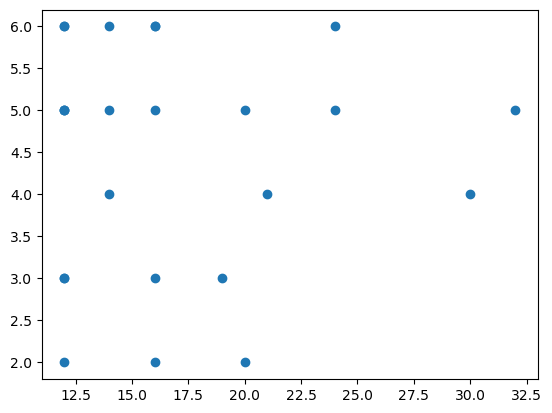

In [34]:
plt.scatter(dados['demanda'], dados['dia_semana'])

In [ ]:
y = dados['demanda']
X = dados.drop('demanda', axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# clf = svm.SVR(C=1, kernel='linear', degree=8, gamma='scale', coef0=10)
clf = ElasticNet(max_iter=10000)
clf.fit(X_train, y_train)

In [ ]:
clf.score(X_test, y_test)

In [ ]:
# predictions = clf.predict(X_test)
# print(f'Model fit results:\n'
#       f'r2_score {r2_score(y_test, predictions)} \t MSE {mean_squared_error(y_test, predictions)}'
#       f'\tEVS {explained_variance_score(y_test, predictions)} \n MAE {mean_absolute_error(y_test, predictions)}'
#       f'\tMAD {median_absolute_error(y_test, predictions)}\t ME {max_error(y_test, predictions)}')